In [1]:
import trees
from fuzzingbook.GrammarFuzzer import display_tree
import random

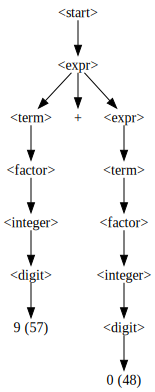

In [2]:
display_tree(trees.tree)

In [3]:
print(trees.tree)

('<start>', [('<expr>', [('<term>', [('<factor>', [('<integer>', [('<digit>', [('9', None)])])])]), (' + ', []), ('<expr>', [('<term>', [('<factor>', [('<integer>', [('<digit>', [('0', [])])])])])])])])


In [4]:
def find_subtrees(tree, symbol):
    subtrees = []
    if tree[0] == symbol:
        subtrees.append(tree)
    if tree[1] is not None:
        for child in tree[1]:
            subtrees += find_subtrees(child,symbol)
    return subtrees

In [5]:
trees_list = find_subtrees(trees.tree, '<digit>')
trees_list

[('<digit>', [('9', None)]), ('<digit>', [('0', [])])]

In [6]:
def modified_tree(tree,old_subtree,new_subtree):
    if tree == old_subtree:
        tree = new_subtree
    elif tree[1] is not None:
        tree = (tree[0],[modified_tree(child,old_subtree,new_subtree) for child in tree[1]])
    return tree

def replace_random_subtree(tree, symbol, subtrees):
    to_replace = random.choice(find_subtrees(tree,symbol))
    replace_with = random.choice(subtrees)
    return modified_tree(tree,to_replace,replace_with)

In [15]:
subtrees = [('<digit>', [('1', None)]), ('<digit>', [('2', None)])]
new_tree = replace_random_subtree(trees.tree,'<digit>',subtrees)
display_tree(new_tree)

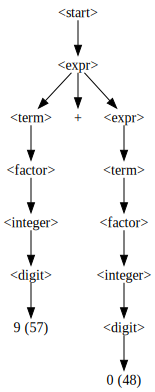

In [8]:
display_tree(trees.tree)